In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Model:
    def __init__(self,numFeatures,numDataPoints = 100,lr = 0.1):
        self._numFeatures =numFeatures
        self._numDataPoints = numDataPoints
        self._weights = np.random.normal(0,1,self._numFeatures+1)
        self._X = np.zeros((self._numFeatures+1,self._numDataPoints))
        self._Y = np.zeros((self._numDataPoints))
        self._Costs=  []
        self._lr   = lr
        self.dataGenerator()
        self._isTrained = False
        self.normalize()
        
        
    
    @property
    def weights(self):
        return self._weights

    @property
    def Costs(self):
        return self._Costs
    @property
    def CurrentCost(self):
        return self._Costs[-1]
    
    def getFeature(self,featureNo = 0,getY = False) :
        return self._X[featureNo,:] if getY== False else  np.array([self._X[featureNo,:],self._Y])
    
    
    def dataGenerator(self):
        boundaryX = np.random.randint(-100,3000,size = (self._numFeatures,2))
        for count in range(self._X[:-1].shape[0]):
            self._X[count] = np.linspace(*boundaryX[count],self._numDataPoints,endpoint=True)
            

        # self._X[:-1,:] = np.random.normal(size = (self._numFeatures,self._numDataPoints))
        self._X[-1,:] = np.ones((self._numDataPoints))
        self._Y = np.linspace(10,100,self._numDataPoints) + np.random.randint(-30,30,self._numDataPoints)
        self._Costs.append(self.CalculateCost())

    def plotXY(self,featureNo=0):
        if  type(featureNo) == int:
            fig,ax = plt.subplots(1,1,sharex=False,sharey=False)
            ax.scatter(*self.getFeature(featureNo,getY = True))
        elif type(featureNo) == list or type(featureNo) == np.ndarray :
            fig,ax = plt.subplots(1,len(featureNo),sharex=False,sharey=False)
            for count in range(len(featureNo)):
                ax[count].scatter(*self.getFeature(featureNo[count],getY = True))
                ax[count].set_title(f"Feature {featureNo[count]} vs Y")
                ax[count].grid(visible = True)
        plt.show()

    def normalize(self):
        for i in range(self._X.shape[0]):
            self._X[i] = self._X[i]/self._X[i].mean() 


    def CalculateCost(self):
        totalCost = np.square(np.dot(self._weights,self._X) - self._Y).sum()/(2*self._Y.size)
        return totalCost

    def AdjustWeight(self):
        dW = np.dot((np.dot(self._weights,self._X) - self._Y),self._X.T)/self._Y.size
        self._weights = self._weights - self._lr*dW
        self._Costs.append(self.CalculateCost())
        self._isTrained = True

    def trainedModel(self):
        if self._isTrained is False:
            print("The model not yet Trained! Getting you the model calculated from the default weights.")
        return np.dot(self._weights,self._X)

In [3]:
model = Model(numFeatures = 2, numDataPoints = 100)


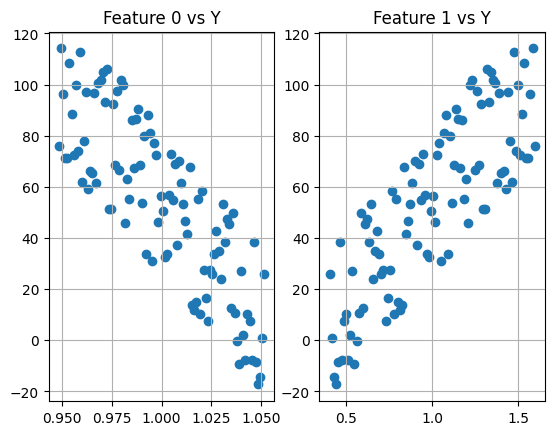

In [4]:
model.plotXY([0,1])

In [5]:
model.CalculateCost()

1902.973462771194

In [6]:
for i in range(100000):
        model.AdjustWeight()


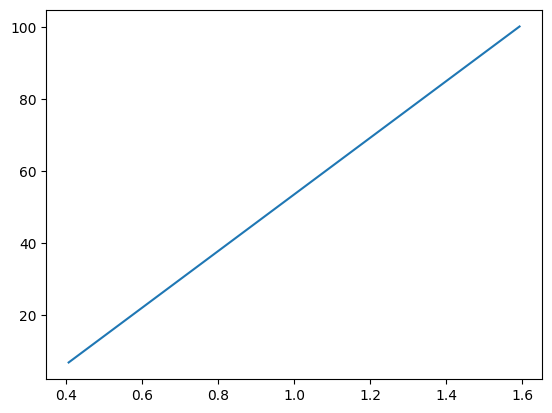

In [7]:
# model.plotXY(featureNo=1)
plt.plot(model.getFeature(featureNo=1),model.trainedModel())

In [8]:
model.CurrentCost

178.7680294629463

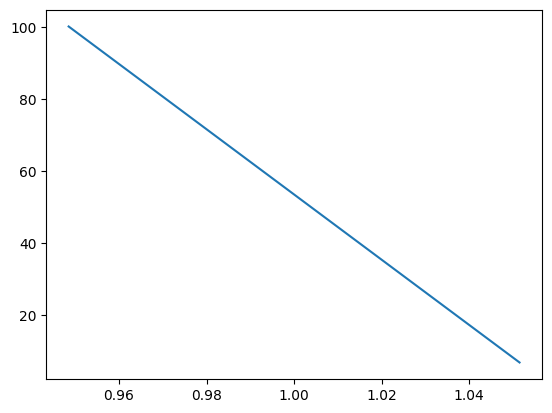

In [9]:
plt.plot(model.getFeature(0),model.trainedModel())

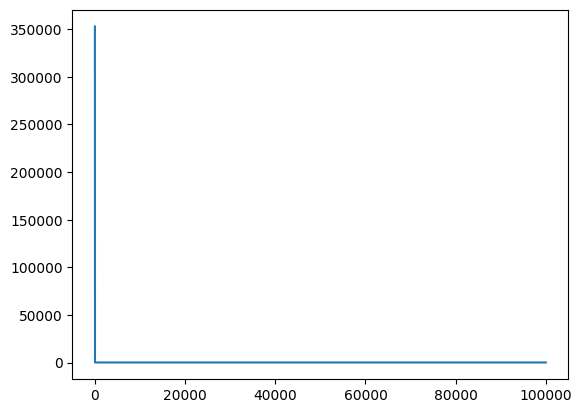

In [10]:
plt.plot(model.Costs)

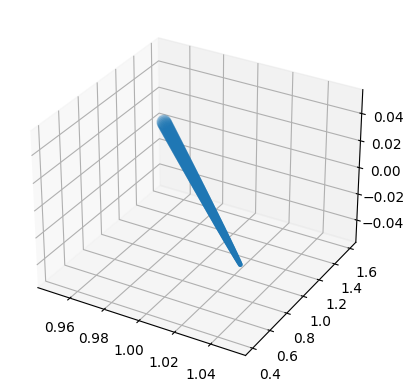

In [12]:
plt.subplot(111,projection  ="3d")
%matplotlib inline
plt.scatter(model.getFeature(featureNo=0),model.getFeature(featureNo=1),model.trainedModel())

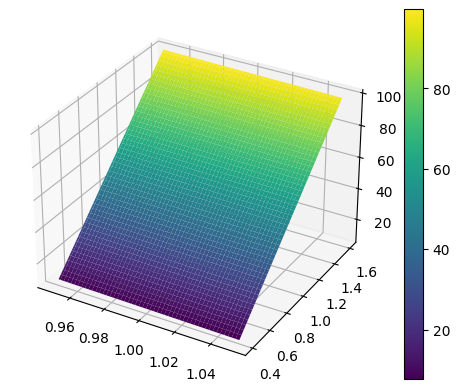

In [25]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
X = model._X[0]
Y = model._X[1]
Z = np.dot(model.weights,model._X)
X,Y = np.meshgrid(X,Y)
Z = model.weights[0]*X + model.weights[1]*Y + model.weights[2]
surf = ax.plot_surface(X,Y,Z,cmap= "viridis")
fig.colorbar(surf,ax =ax)